In [12]:
# importing libraries 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from profanity_filter import ProfanityFilter

In [13]:
# importing black lives matter df  (blm)

pre_blm = pd.read_csv('BlackLM_Toxicity_pre.csv', index_col = 0)
pre_blm = pre_blm[pre_blm.ToxicityScore<100]

during_blm = pd.read_csv('BlackLM_Toxicity_during.csv', index_col = 0)
during_blm = during_blm[during_blm.ToxicityScore<100]

post_blm = pd.read_csv('BlackLM_Toxicity_post.csv', index_col = 0)
post_blm = post_blm[post_blm.ToxicityScore<100]

# importing blue lives matter df (clm = cop lives matters)

pre_clm = pd.read_csv('BlueLM_Toxicity_pre.csv', index_col = 0)
pre_clm = pre_clm[pre_clm.ToxicityScore<100]

during_clm = pd.read_csv('BlueLM_Toxicity_during.csv', index_col = 0)
during_clm = during_clm[during_clm.ToxicityScore<100]

post_clm = pd.read_csv('BlueLM_Toxicity_post.csv', index_col = 0)
post_clm = post_clm[post_clm.ToxicityScore<100]

# putting df in a list 

blm_list = [pre_blm, during_blm, post_blm]
clm_list = [pre_clm, during_clm, post_clm]


In [122]:
# calculating average toxicity score per period 
score = []
labels = ['Black Lives Matter']*3+ ['Blue Lives Matter']*3
period = ['Pre-Event', 'During', 'Post-Event']*2

for df in blm_list:
    score.append(np.mean(df.ToxicityScore))
    
for df in clm_list:
    score.append(np.mean(df.ToxicityScore))

results = pd.DataFrame({'Period': period,
                       'Score': np.array(score)*100,
                       'Movement': labels})

In [123]:
results

,Period,Score,Movement
0,Pre-Event,37.073403,Black Lives Matter
1,During,27.956903,Black Lives Matter
2,Post-Event,33.628073,Black Lives Matter
3,Pre-Event,30.820146,Blue Lives Matter
4,During,36.627652,Blue Lives Matter
5,Post-Event,33.121232,Blue Lives Matter


In [124]:
np.arange(1,4)

array([1, 2, 3])

In [125]:
results[results.Movement =='Black Lives Matter']

,Period,Score,Movement
0,Pre-Event,37.073403,Black Lives Matter
1,During,27.956903,Black Lives Matter
2,Post-Event,33.628073,Black Lives Matter


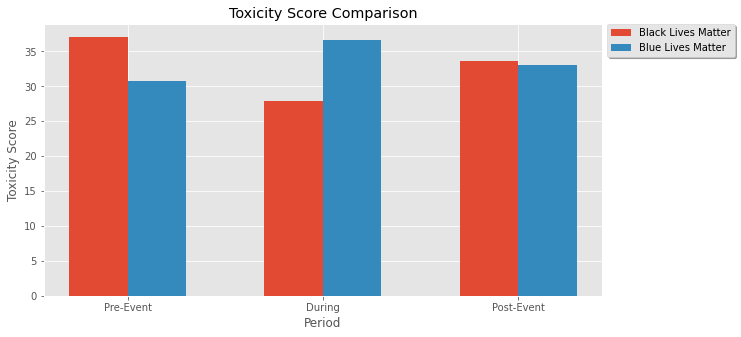

In [126]:
# Position of bars on x-axis
plt.style.use('ggplot')

# Figure size
plt.figure(figsize=(10,5))
ax = plt.subplot()

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(np.array([1,2,3]), results[results.Movement =='Black Lives Matter']['Score'] , width, label='Black Lives Matter')
plt.bar(np.array([1,2,3])+width, results[results.Movement =='Blue Lives Matter']['Score'] , width, label='Blue Lives Matter')

plt.xlabel('Period')
plt.ylabel('Toxicity Score')
plt.title('Toxicity Score Comparison')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(np.array([1,2,3]) + width / 2, ('Pre-Event', 'During', 'Post-Event'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.94), fancybox=True, shadow=True)

plt.show()

## Extension

In [103]:
!pip install profanity-filter

     ---------------------------------------- 46.0/46.0 KB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 72.1/72.1 KB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 9.7/9.7 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 318.6/318.6 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 6.6/6.6 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 113.0/113.0 KB 6.9 MB/s eta 0:00:00
     -------------------------------------- 910.4/910.4 KB 9.6 MB/s eta 0:00:00
     ------------------------------------- 178.2/178.2 KB 10.5 MB/s eta 0:00:00
  Created wheel for ordered-set: filename=ordered_set-3.1.1-py2.py3-none-any.whl size=7812 sha256=38fcc271b3eca1c1163dc070b653e1ca42732fb86b96de4b71f2518b8857a6

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [207]:
blm = pd.read_csv('cleaned_blm.csv', index_col = 0)
blm = blm.dropna()
clm = pd.read_csv('cleaned_bluelm.csv', index_col = 0)
clm = clm.dropna()

In [208]:
print('blm shape:',blm.shape)
print('clm shape:',clm.shape)

blm shape: (11126, 8)
clm shape: (10375, 8)


In [210]:
# fetching swear words for both datasets

nlp = spacy.load('en')
profanity_filter = ProfanityFilter(nlps={'en': nlp})  # reuse spacy Language (optional)
nlp.add_pipe(profanity_filter.spacy_component, last=True)



number_profanity = []
word_dict = {}

for row in blm.iterrows():
    tweet = row[1]['LemmatizedTweet'].lstrip()
    doc = nlp(tweet)
    word = []
    swear =[]
    for token in doc:
        word.append(token._.is_profane)
        swear.append(token._.original_profane_word)
    
    number_profanity.append(sum(np.array(word)))
    swear = list(filter(None, swear))
    
    for w in swear:
        if w in word_dict.keys():
            word_dict[w] =+1
        else:
            word_dict[w] = 1


In [212]:
blm['is_profane_count'] = number_profanity
blm['is_profane'] = blm['is_profane_count'].apply(lambda x: 1 if x>=1 else 0)

# get proportion 

p_blm = blm.is_profane.sum()/blm.shape[0]

In [219]:
blm['is_profane'].value_counts() # we can perform statistical inference because n>10 and n(1-P)>10

0    10553
1      573
Name: is_profane, dtype: int64

In [220]:
# fetching swear words for both datasets

nlp = spacy.load('en')
profanity_filter = ProfanityFilter(nlps={'en': nlp})  # reuse spacy Language (optional)
nlp.add_pipe(profanity_filter.spacy_component, last=True)



number_profanity_clm = []
word_dict_clm = {}

for row in clm.iterrows():
    tweet = row[1]['LemmatizedTweet'].lstrip()
    doc = nlp(tweet)
    word = []
    swear =[]
    for token in doc:
        word.append(token._.is_profane)
        swear.append(token._.original_profane_word)
    
    number_profanity_clm.append(sum(np.array(word)))
    
    swear = list(filter(None, swear))
    
    for w in swear:
        if w in word_dict_clm.keys():
            word_dict_clm[w] =+1
        else:
            word_dict_clm[w] = 1

In [223]:
clm['is_profane_count'] = number_profanity_clm
clm['is_profane'] = clm['is_profane_count'].apply(lambda x: 1 if x>=1 else 0)

# get proportion 

p_clm = clm.is_profane.sum()/clm.shape[0]

In [224]:
clm['is_profane'].value_counts() # we can perform statistical inference because n>10 and n(1-P)>10

0    9703
1     672
Name: is_profane, dtype: int64

In [225]:
p_clm

0.06477108433734939

# statistical inference

In [229]:
from statsmodels.stats.proportion import test_proportions_2indep

count1 = clm.is_profane.sum()
nobs1 = clm.shape[0]
count2 = blm.is_profane.sum()
nobs2=  blm.shape[0]


In [230]:
stat, pval = test_proportions_2indep(count1, nobs1, count2, nobs2, compare= 'diff', alternative='larger')

In [231]:
print('statistics:', stat)
print('pvalue:', pval) # statistically significant, blue lives matter swear more than black lives matter at a 5% level

statistics: 4.147778231788255
pvalue: 1.678586775843119e-05


# Comparison of swear words

In [244]:
swear_words_blm = blm[blm['is_profane_count']>=1].LemmatizedTweet

In [265]:
dictionnary_blm = {}

for tweet in swear_words_blm:
    doc = nlp(tweet)
    for token in doc:
        if token._.is_profane == True:
            if token._.original_profane_word in dictionnary_blm:
                dictionnary_blm[token._.original_profane_word] += 1
            else:
                dictionnary_blm[token._.original_profane_word] = 1

In [268]:
swear_words_clm = clm[clm['is_profane_count']>=1].LemmatizedTweet

dictionnary_clm = {}

for tweet in swear_words_clm:
    doc = nlp(tweet)
    for token in doc:
        if token._.is_profane == True:
            if token._.original_profane_word in dictionnary_clm:
                dictionnary_clm[token._.original_profane_word] += 1
            else:
                dictionnary_clm[token._.original_profane_word] = 1

In [289]:
clm_count = pd.DataFrame(dictionnary_clm, index=['Count']).T.reset_index().rename(columns={'index':'Word'}).sort_values(by='Count',ascending=False).reset_index(drop=True).loc[:9]
blm_count = pd.DataFrame(dictionnary_blm, index=['Count']).T.reset_index().rename(columns={'index':'Word'}).sort_values(by='Count',ascending=False).reset_index(drop=True).loc[:9]

In [291]:
blm_count

,Word,Count
0,fuck,212
1,shit,109
2,damn,64
3,hell,47
4,bullshit,36
5,piss,23
6,bitch,20
7,nazi,19
8,gay,16
9,crap,15


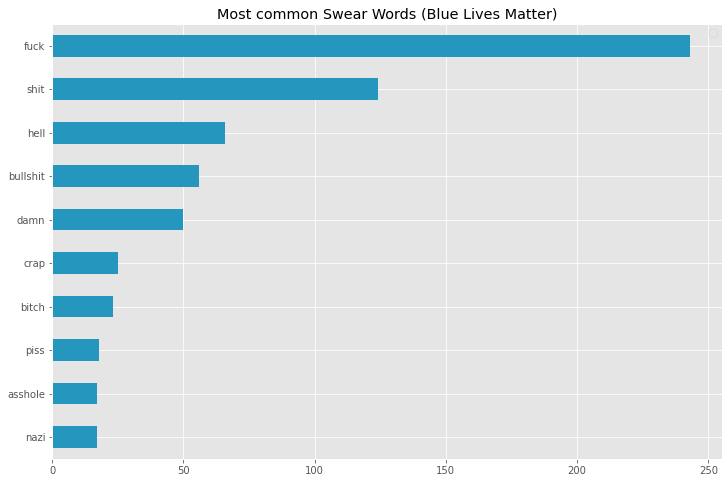

In [321]:
# Plot horizontal bar graph
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))
clm_count.sort_values(by='Count').plot.barh(x='Word',
                      y='Count',
                      ax=ax,
                      color="#2596be")
plt.ylabel('')
plt.legend('')
ax.set_title("Most common Swear Words (Blue Lives Matter)")
plt.show()

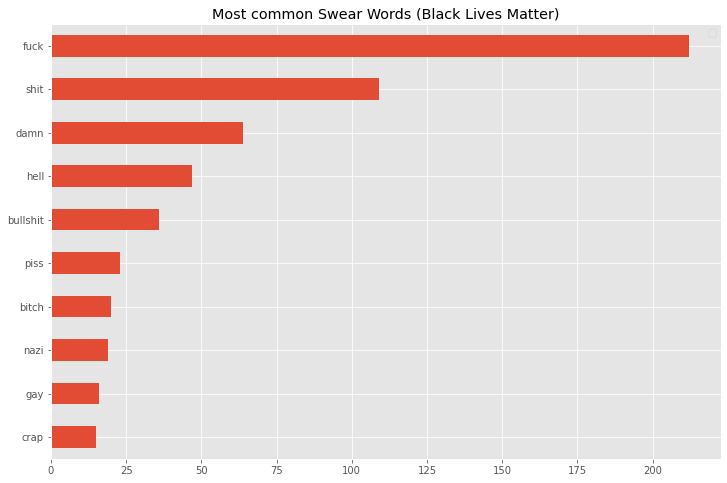

In [320]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(12, 8))

blm_count.sort_values(by='Count').plot.barh(x='Word',
                      y='Count',
                      ax=ax,
                      color="#e34c34")
plt.ylabel('')
plt.legend('')
ax.set_title("Most common Swear Words (Black Lives Matter)")
plt.show()